# Train OCR text Detector quick example

In [1]:
import os
import sys
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')

# change this property
NOMEROFF_NET_DIR = os.path.abspath('../')


sys.path.append(NOMEROFF_NET_DIR)

from nomeroff_net.TextDetectors.base import OCR

In [2]:
plt.rcParams["figure.figsize"] = (10, 10)

In [3]:
%matplotlib inline 

In [5]:
# auto download latest dataset
from nomeroff_net.tools import modelhub

# auto download latest dataset
info = modelhub.download_dataset_for_model("EuUa1995")
PATH_TO_DATASET = info["dataset_path"]

autoriaNumberplateOcrUa-1995-2021-08-25.zip:   0%|          | 16.4k/1.38G [00:00<2:21:23, 162kB/s]

Downloaded model path: /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/EuUa1995/autoriaNumberplateOcrUa-1995-2021-08-25.zip


autoriaNumberplateOcrUa-1995-2021-08-25.zip: 1.38GB [06:57, 3.30MB/s]                             


In [6]:
DATASET_NAME = "eu_1995"
VERSION = "2021_08_25_pytorch_lightning"

RESULT_MODEL_PATH = os.path.join(NOMEROFF_NET_DIR, 
                                 "models/", 
                                 'anpr_ocr_{}_{}.ckpt'.format(DATASET_NAME, VERSION))

In [7]:
RESULT_MODEL_PATH

'/var/www/nomeroff-net24/models/anpr_ocr_eu_1995_2021_08_25_pytorch_lightning.ckpt'

In [11]:
class eu_ua_1995(OCR):
    def __init__(self):
        OCR.__init__(self)
        # only for usage model
        # in train generate automaticly
        self.letters = ["0", "1", "2", "3", "4", "5", "6", "7", "8", 
                        "9", "A", "B", "C", "E", "H", "I", "K", "M", 
                        "O", "P", "T", "X"]
        
        self.epochs = 50
        self.batch_size = 256
        self.gpus = 1

In [12]:
ocrTextDetector = eu_ua_1995()
model = ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=False, num_workers=6)

GET ALPHABET
Max plate length in "val": 7
Max plate length in "train": 7
Max plate length in "test": 7
Letters train  {'9', '3', 'P', 'M', '6', '0', 'A', 'T', 'I', '8', 'X', '1', 'H', 'O', 'C', 'B', 'K', '4', 'E', '5', '2', '7'}
Letters val  {'9', '3', 'P', 'M', '6', '0', 'A', 'T', 'I', '8', 'X', '1', 'H', 'O', 'C', 'B', 'K', '4', 'E', '5', '2', '7'}
Letters test  {'9', '3', 'P', 'M', '6', '0', 'A', 'T', 'I', '8', 'X', '1', 'H', 'O', 'C', 'B', 'K', '4', 'E', '5', '2', '7'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C E H I K M O P T X

EXPLAIN DATA TRANSFORMATIONS
START BUILD DATA
DATA PREPARED


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | resnet  | Sequential | 2.8 M 
1 | cnn     | BlockCNN   | 590 K 
2 | linear1 | Linear     | 524 K 
3 | gru1    | BlockRNN   | 139 K 
4 | gru2    | BlockRNN   | 16.9 K
5 | linear2 | Linear     | 1.5 K 
---------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.225    Total estimated model params size (MB)


Restored states from the checkpoint file at /var/www/nomeroff-net24/train/lr_find_temp_model.ckpt


Found lr: 0.12589254117941648



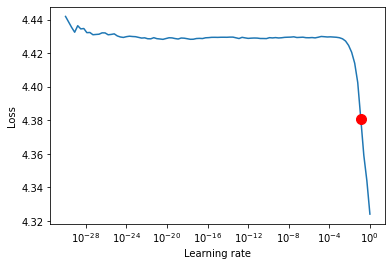

In [13]:
# tune
lr_finder = ocrTextDetector.tune()

# Plot with
fig = lr_finder.plot(suggest=True)
fig.show()

In [14]:
model = ocrTextDetector.train()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch    48: reducing learning rate of group 0 to 2.0000e-03.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[INFO] best model path /var/www/nomeroff-net24/nomeroff_net/data/logs/ocr/epoch=41-step=8441.ckpt



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': 0.0146182244643569}
--------------------------------------------------------------------------------


In [28]:
ocrTextDetector.save(RESULT_MODEL_PATH)

model save to /var/www/nomeroff-net24/models/anpr_ocr_eu_1995_2021_08_25_pytorch_lightning.ckpt


In [16]:
ocrTextDetector.test_acc(verbose=True)


[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/EuUa1995/autoriaNumberplateOcrUa-1995-2021-01-12/test/img/06333CH_7849.png
Predicted: 0633ch 			 True: 06333ch

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/EuUa1995/autoriaNumberplateOcrUa-1995-2021-01-12/test/img/43498OK_24456.png
Predicted: 43498ck 			 True: 43498ok

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/EuUa1995/autoriaNumberplateOcrUa-1995-2021-01-12/test/img/43013AE_19399.png
Predicted: 44013ae 			 True: 43013ae

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/EuUa1995/autoriaNumberplateOcrUa-1995-2021-01-12/test/img/84773HI_43107.png
Predicted: 84773h 			 True: 84773hi

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/EuUa1995/autoriaNumberplateOcrUa-1995-2021-01-12/test/img/68873IX_120.png
Predicted: 8873ix 			 True: b8873ix

[INFO] /var/www

0.979047619047619

## than train with augumentation

In [8]:
class eu_ua_1995(OCR):
    def __init__(self):
        OCR.__init__(self)
        # only for usage model
        # in train generate automaticly
        self.letters = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'E', 'H', 'I', 'K', 'M',
                        'O', 'P', 'T', 'X']
        
        self.epochs = 25
        self.batch_size = 256
        self.gpus = 1

In [9]:
ocrTextDetector = eu_ua_1995()
model = ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=True, num_workers=6)

GET ALPHABET
Max plate length in "val": 7
Max plate length in "train": 7
Max plate length in "test": 7
Letters train  {'4', '0', 'O', 'I', '8', '1', 'M', 'X', 'H', '3', '7', 'P', 'B', '6', '9', 'E', 'T', 'C', '2', 'K', '5', 'A'}
Letters val  {'4', '0', 'O', 'I', '8', '1', 'M', 'X', 'H', 'A', '3', '7', 'P', 'B', '6', 'E', 'T', 'C', '2', 'K', '5', '9'}
Letters test  {'4', '0', 'O', 'I', '8', '1', 'M', 'X', 'H', 'A', '3', '7', 'B', 'P', '6', 'E', 'T', 'C', '2', 'K', '5', '9'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C E H I K M O P T X

EXPLAIN DATA TRANSFORMATIONS
START BUILD DATA
DATA PREPARED


In [10]:
ocrTextDetector.load(RESULT_MODEL_PATH)

NPOcrNet(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | resnet  | Sequential | 2.8 M 
1 | cnn     | BlockCNN   | 590 K 
2 | linear1 | Linear     | 524 K 
3 | gru1    | BlockRNN   | 139 K 
4 | gru2    | BlockRNN   | 16.9 K
5 | linear2 | Linear     | 1.5 K 
---------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.225    Total estimated model params size (MB)
Global seed set to 6


Restored states from the checkpoint file at /var/www/nomeroff-net24/train/lr_find_temp_model.ckpt
Global seed set to 7
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Found lr: 0.5011872336272719


Global seed set to 7


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[INFO] best model path /var/www/nomeroff-net24/nomeroff_net/data/logs/ocr/epoch=24-step=5024-v3.ckpt



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': 0.012395620346069336}
--------------------------------------------------------------------------------

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/EuUa1995/autoriaNumberplateOcrUa-1995-2021-01-12/test/img/68873IX_120.png
Predicted: 88873ix 			 True: b8873ix

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/EuUa1995/autoriaNumberplateOcrUa-1995-2021-01-12/test/img/22333XM_40469.png
Predicted: 2233xm 			 True: 22333xm

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/EuUa1995/autoriaNumberplateOcrUa-1995-2021-01-12/test/img/63978HA_51169.png
Predicted: 63978ha 			 True: 6397bha

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/EuUa1995/autoriaNumberplateOcrUa-1995-2021-01-12/test/img/33765XM_8934.png
Predicted: 3765xm 			 Tr

GPU available: True, used: True
TPU available: False, using: 0 TPU cores



[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/EuUa1995/autoriaNumberplateOcrUa-1995-2021-01-12/test/img/46990KB_24702.png
Predicted: 4990kb 			 True: 46990kb
Testing Accuracy:  0.9885714285714285
model save to /var/www/nomeroff-net24/models/anpr_ocr_eu_1995_2021_08_25_pytorch_lightning.ckpt.7


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | resnet  | Sequential | 2.8 M 
1 | cnn     | BlockCNN   | 590 K 
2 | linear1 | Linear     | 524 K 
3 | gru1    | BlockRNN   | 139 K 
4 | gru2    | BlockRNN   | 16.9 K
5 | linear2 | Linear     | 1.5 K 
---------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.225    Total estimated model params size (MB)
Global seed set to 7


Restored states from the checkpoint file at /var/www/nomeroff-net24/train/lr_find_temp_model.ckpt
Global seed set to 8
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Found lr: 0.5011872336272719



Global seed set to 8


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[INFO] best model path /var/www/nomeroff-net24/nomeroff_net/data/logs/ocr/epoch=22-step=4622.ckpt



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': 0.014843324199318886}
--------------------------------------------------------------------------------

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/EuUa1995/autoriaNumberplateOcrUa-1995-2021-01-12/test/img/77711XK_36657.png
Predicted: 7711xk 			 True: 77711xk

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/EuUa1995/autoriaNumberplateOcrUa-1995-2021-01-12/test/img/68873IX_120.png
Predicted: 8873ix 			 True: b8873ix

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/EuUa1995/autoriaNumberplateOcrUa-1995-2021-01-12/test/img/00941TC_2717.png
Predicted: 00941ic 			 True: 00941tc

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/EuUa1995/autoriaNumberplateOcrUa-1995-2021-01-12/test/img/63978HA_51169.png
Predicted: 63978ha 			 Tr

GPU available: True, used: True
TPU available: False, using: 0 TPU cores



[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/EuUa1995/autoriaNumberplateOcrUa-1995-2021-01-12/test/img/46990KB_24702.png
Predicted: 4990kb 			 True: 46990kb
Testing Accuracy:  0.9838095238095238
model save to /var/www/nomeroff-net24/models/anpr_ocr_eu_1995_2021_08_25_pytorch_lightning.ckpt.8


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | resnet  | Sequential | 2.8 M 
1 | cnn     | BlockCNN   | 590 K 
2 | linear1 | Linear     | 524 K 
3 | gru1    | BlockRNN   | 139 K 
4 | gru2    | BlockRNN   | 16.9 K
5 | linear2 | Linear     | 1.5 K 
---------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.225    Total estimated model params size (MB)
Global seed set to 8


Restored states from the checkpoint file at /var/www/nomeroff-net24/train/lr_find_temp_model.ckpt
Global seed set to 9
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Found lr: 0.5011872336272719


Global seed set to 9


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[INFO] best model path /var/www/nomeroff-net24/nomeroff_net/data/logs/ocr/epoch=23-step=4823-v3.ckpt



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': 0.007954463362693787}
--------------------------------------------------------------------------------

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/EuUa1995/autoriaNumberplateOcrUa-1995-2021-01-12/test/img/06689MO_18707.png
Predicted: 0689mo 			 True: 06689mo

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/EuUa1995/autoriaNumberplateOcrUa-1995-2021-01-12/test/img/68873IX_120.png
Predicted: 88873ix 			 True: b8873ix

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/EuUa1995/autoriaNumberplateOcrUa-1995-2021-01-12/test/img/63978HA_51169.png
Predicted: 63978ha 			 True: 6397bha

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/EuUa1995/autoriaNumberplateOcrUa-1995-2021-01-12/test/img/47464MO_40758.png
Predicted: 47464ho 			 

GPU available: True, used: True
TPU available: False, using: 0 TPU cores



[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/EuUa1995/autoriaNumberplateOcrUa-1995-2021-01-12/test/img/46990KB_24702.png
Predicted: 45990kb 			 True: 46990kb
Testing Accuracy:  0.9914285714285714
model save to /var/www/nomeroff-net24/models/anpr_ocr_eu_1995_2021_08_25_pytorch_lightning.ckpt.9


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | resnet  | Sequential | 2.8 M 
1 | cnn     | BlockCNN   | 590 K 
2 | linear1 | Linear     | 524 K 
3 | gru1    | BlockRNN   | 139 K 
4 | gru2    | BlockRNN   | 16.9 K
5 | linear2 | Linear     | 1.5 K 
---------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.225    Total estimated model params size (MB)
Global seed set to 9


Restored states from the checkpoint file at /var/www/nomeroff-net24/train/lr_find_temp_model.ckpt
Global seed set to 10
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Found lr: 0.12589254117941648



Global seed set to 10


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[INFO] best model path /var/www/nomeroff-net24/nomeroff_net/data/logs/ocr/epoch=23-step=4823-v4.ckpt



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': 0.010546297766268253}
--------------------------------------------------------------------------------

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/EuUa1995/autoriaNumberplateOcrUa-1995-2021-01-12/test/img/56039CA_33180.png
Predicted: 564039ca 			 True: 56039ca

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/EuUa1995/autoriaNumberplateOcrUa-1995-2021-01-12/test/img/68873IX_120.png
Predicted: 88873ix 			 True: b8873ix

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/EuUa1995/autoriaNumberplateOcrUa-1995-2021-01-12/test/img/63978HA_51169.png
Predicted: 63978ha 			 True: 6397bha

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/EuUa1995/autoriaNumberplateOcrUa-1995-2021-01-12/test/img/93113KB_1094.png
Predicted: 93113kp 			

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | resnet  | Sequential | 2.8 M 
1 | cnn     | BlockCNN   | 590 K 
2 | linear1 | Linear     | 524 K 
3 | gru1    | BlockRNN   | 139 K 
4 | gru2    | BlockRNN   | 16.9 K
5 | linear2 | Linear     | 1.5 K 
---------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.225    Total estimated model params size (MB)


Testing Accuracy:  0.9876190476190476
model save to /var/www/nomeroff-net24/models/anpr_ocr_eu_1995_2021_08_25_pytorch_lightning.ckpt.10


Global seed set to 10


Restored states from the checkpoint file at /var/www/nomeroff-net24/train/lr_find_temp_model.ckpt
Global seed set to 11
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Found lr: 0.5011872336272719



Global seed set to 11


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[INFO] best model path /var/www/nomeroff-net24/nomeroff_net/data/logs/ocr/epoch=23-step=4823-v5.ckpt



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': 0.013279355131089687}
--------------------------------------------------------------------------------

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/EuUa1995/autoriaNumberplateOcrUa-1995-2021-01-12/test/img/68873IX_120.png
Predicted: 88873ix 			 True: b8873ix

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/EuUa1995/autoriaNumberplateOcrUa-1995-2021-01-12/test/img/63978HA_51169.png
Predicted: 63978ha 			 True: 6397bha

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/EuUa1995/autoriaNumberplateOcrUa-1995-2021-01-12/test/img/33765XM_8934.png
Predicted: 3765xm 			 True: 33765xm

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/EuUa1995/autoriaNumberplateOcrUa-1995-2021-01-12/test/img/57885PE_1341.png
Predicted: 5785pe 			 Tru

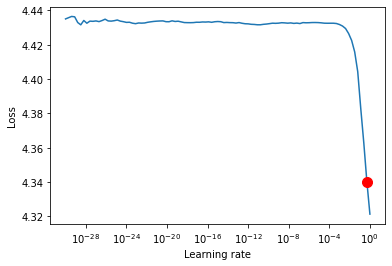

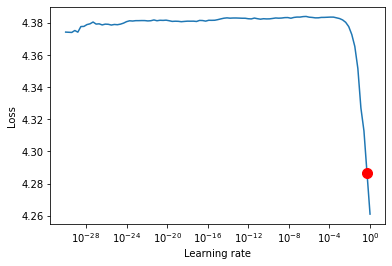

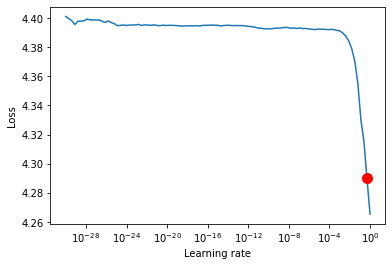

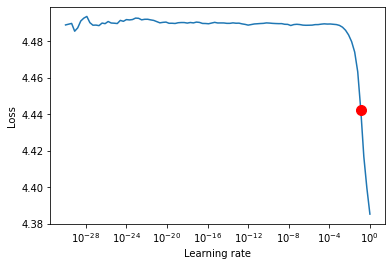

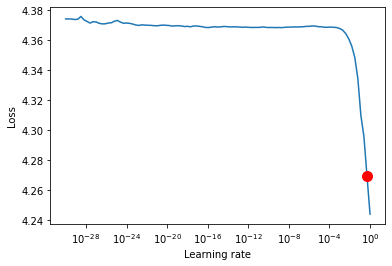

In [37]:
# tune
lr_finder = ocrTextDetector.tune()

# Plot with
fig = lr_finder.plot(suggest=True)
fig.show()

In [31]:
model = ocrTextDetector.train(seed=4)

Global seed set to 3
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Global seed set to 3


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[INFO] best model path /var/www/nomeroff-net24/nomeroff_net/data/logs/ocr/epoch=23-step=4823.ckpt



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': 0.010754729621112347}
--------------------------------------------------------------------------------


In [11]:
ocrTextDetector.test_acc(verbose=True)


[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/EuUa1995/autoriaNumberplateOcrUa-1995-2021-08-25/test/img/04653OT_23686.png
Predicted: 04653oi 			 True: 04653ot

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/EuUa1995/autoriaNumberplateOcrUa-1995-2021-08-25/test/img/04923TB_43206.png
Predicted: 84923tb 			 True: 04923tb

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/EuUa1995/autoriaNumberplateOcrUa-1995-2021-08-25/test/img/23519IB_3102.png
Predicted: 25519ib 			 True: 23519ib

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/EuUa1995/autoriaNumberplateOcrUa-1995-2021-08-25/test/img/25933OA_17106.png
Predicted: 25930oa 			 True: 25933oa

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/EuUa1995/autoriaNumberplateOcrUa-1995-2021-08-25/test/img/83104HI_37155.png
Predicted: 83104h 			 True: 83104hi

[INFO] /var

0.9932497589199615

In [ ]:
for i in range(7,12):
    # tune
    lr_finder = ocrTextDetector.tune()

    # Plot with
    fig = lr_finder.plot(suggest=True)
    fig.show()
    model = ocrTextDetector.train(seed=i)
    ocrTextDetector.test_acc(verbose=True)
    ocrTextDetector.save('{}.{}'.format(RESULT_MODEL_PATH,i))

In [ ]:
# 0.014759304890265832 per one photo
